In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
count_classes = pd.value_counts(data['Class'])

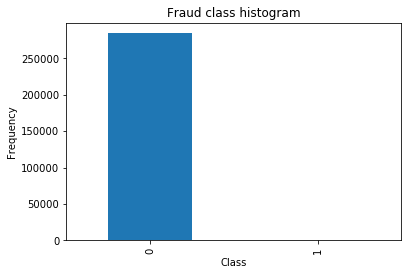

In [4]:
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [5]:
#standardscaler
from sklearn.preprocessing import StandardScaler
#data['normalAmount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1,1))
#data = data.drop(['Time','Amount'],axis=1)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#undersample

#fraud data
fraud=data[data['Class']==1]
num_fraud = len(fraud)

In [7]:
#index of normal data
normal_index = data[data['Class']==0].index#
random_normal_index = np.random.choice(normal_index,num_fraud,replace=False)
#undersample of normal data
undersample_normal = data.iloc[random_normal_index,:]
#undersample of fraud data
undersample_fraud = fraud
#whole undersample
undersample_index = np.concatenate([random_normal_index, fraud.index])
undersample = data.iloc[undersample_index,:]

undersample_normal_x = undersample_normal.iloc[:,data.columns != 'Class']
undersample_normal_y = undersample_normal.iloc[:,data.columns == 'Class']
undersample_fraud_x = fraud.iloc[:,data.columns != 'Class']
undersample_fraud_y = fraud.iloc[:,data.columns == 'Class']


In [8]:
undersample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
117240,74597.0,-0.751403,0.853750,1.439256,-0.482363,1.047563,1.689045,0.350233,0.669191,-0.797651,...,-0.057205,0.033838,0.029396,-1.333528,-0.521021,0.197911,0.377775,0.150746,5.56,0
57112,47760.0,-1.174485,1.441447,1.042781,-0.161490,-0.173503,-0.245683,0.204253,0.454105,-0.702409,...,0.208407,0.471408,0.027831,0.261387,-0.509025,0.178174,-0.171117,0.144621,1.79,0
85136,60624.0,1.104790,-0.381604,-1.212229,-0.468530,1.922411,3.307362,-0.390326,0.779954,-0.065565,...,-0.247249,-1.126474,0.007706,0.997720,0.329369,0.098746,-0.048901,0.030819,111.00,0
9016,12538.0,0.028046,1.021754,1.663999,3.087881,0.434272,0.614962,0.332725,-0.156631,0.370466,...,-0.250012,-0.107587,0.267609,-0.072125,-1.439994,-0.240862,-0.012166,0.004115,3.79,0
78613,57614.0,1.203190,0.056183,0.576976,0.572712,-0.708321,-0.835329,-0.180014,0.047664,0.088710,...,-0.216942,-0.765436,0.175240,0.472940,0.089510,0.071583,-0.046134,0.006256,0.89,0


In [9]:
from sklearn.cross_validation import train_test_split

#whole sample split
    #data and data label
X = data.iloc[:,data.columns != 'Class']
y = data.iloc[:,data.columns == 'Class']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print('number of X_train:',len(X_train))
print('number of X_test:',len(X_test))

#undersample split
X_undersample = undersample.iloc[:,data.columns != 'Class']
y_undersample = undersample.iloc[:,data.columns == 'Class']
X_train_undersample, X_test_undersample, y_train_undersample ,y_test_undersample\
= train_test_split(X_undersample, y_undersample, test_size = 0.3, random_state = 0)
print('number of X_train_undersample:',len(X_train_undersample))
print('number of X_test_undersample:',len(X_test_undersample))
print(y_train_undersample.shape)
print(y_train_undersample.values.ravel().shape)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


number of X_train: 199364
number of X_test: 85443
number of X_train_undersample: 688
number of X_test_undersample: 296
(688, 1)
(688,)


In [10]:
#recall  = TP/(TP+FN)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report 

In [11]:
def printing_Kfold_scores(x_train_data, y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False)
    #Different C parameters
    c_param_range = [0.01,0.1,1,10,100]
    results_table = pd.DataFrame(index = range(len(c_param_range)), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range
    fold = KFold(len(y_train_data),5,shuffle=False)
    
    for c_param in c_param_range:
        print('--------------------------------')
        print('c_parameter = ',c_param)
        print('--------------------------------')
        recall_accs=[]
        iteration = 0
        model_rl = LogisticRegression(penalty='l1',C=c_param)
        for train_index, valid_index in fold:
            model_rl.fit(x_train_data.iloc[train_index,:].values,y_train_data.iloc[train_index,:].values.ravel())
            y_pre = model_rl.predict(x_train_data.iloc[valid_index,:].values)
            recall_acc = recall_score(y_train_data.iloc[valid_index,:].values.ravel(),y_pre)#ravel()?
            recall_accs.append(recall_acc)
            iteration+=1
            print('Iteration:',iteration,'recall_acc:',recall_acc)
        mean_recall_score = sum(recall_accs)/len(recall_accs)
        results_table.loc[results_table['C_parameter'] ==c_param,'Mean recall score']=mean_recall_score
    best_c = results_table.iloc[results_table['Mean recall score'].idxmax()]['C_parameter']
    return best_c



In [12]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)
print('***********************')
print('Best_c:',best_c)
print('***********************')

--------------------------------
c_parameter =  0.01
--------------------------------
Iteration: 1 recall_acc: 0.907692307692
Iteration: 2 recall_acc: 0.8
Iteration: 3 recall_acc: 0.810126582278
Iteration: 4 recall_acc: 0.904761904762
Iteration: 5 recall_acc: 0.87323943662
--------------------------------
c_parameter =  0.1
--------------------------------
Iteration: 1 recall_acc: 0.923076923077
Iteration: 2 recall_acc: 0.938461538462
Iteration: 3 recall_acc: 0.835443037975
Iteration: 4 recall_acc: 0.936507936508
Iteration: 5 recall_acc: 0.901408450704
--------------------------------
c_parameter =  1
--------------------------------
Iteration: 1 recall_acc: 0.923076923077
Iteration: 2 recall_acc: 0.923076923077
Iteration: 3 recall_acc: 0.835443037975
Iteration: 4 recall_acc: 0.936507936508
Iteration: 5 recall_acc: 0.901408450704
--------------------------------
c_parameter =  10
--------------------------------
Iteration: 1 recall_acc: 0.923076923077
Iteration: 2 recall_acc: 0.9076923

In [24]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall acc: 0.906040268456


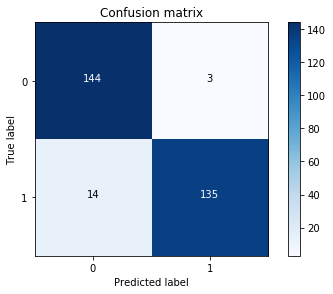

In [37]:
#confusion matrix on undersample, uesing undersample train

import itertools
lr = LogisticRegression(penalty='l1',C=best_c)
lr.fit(X_train_undersample.values,y_train_undersample.values.ravel())
y_pre_undersample = lr.predict(X_test_undersample.values)
cnf_matrix = confusion_matrix(y_test_undersample,y_pre_undersample)
recall_acc = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print('Recall acc:',recall_acc)
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the testing dataset:  0.925170068027


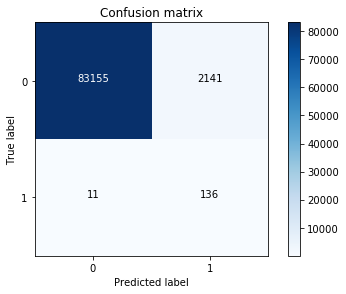

In [29]:
#confusion matrix on whole_sample, uesing undersample train
import itertools
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred= lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [27]:
#using whole_sample to train
best_c = printing_Kfold_scores(X_train,y_train)

--------------------------------
c_parameter =  0.01
--------------------------------
Iteration: 1 recall_acc: 0.477611940299
Iteration: 2 recall_acc: 0.561643835616
Iteration: 3 recall_acc: 0.633333333333
Iteration: 4 recall_acc: 0.569230769231
Iteration: 5 recall_acc: 0.425
--------------------------------
c_parameter =  0.1
--------------------------------
Iteration: 1 recall_acc: 0.582089552239
Iteration: 2 recall_acc: 0.643835616438
Iteration: 3 recall_acc: 0.683333333333
Iteration: 4 recall_acc: 0.584615384615
Iteration: 5 recall_acc: 0.5125
--------------------------------
c_parameter =  1
--------------------------------
Iteration: 1 recall_acc: 0.567164179104
Iteration: 2 recall_acc: 0.630136986301
Iteration: 3 recall_acc: 0.733333333333
Iteration: 4 recall_acc: 0.615384615385
Iteration: 5 recall_acc: 0.5625
--------------------------------
c_parameter =  10
--------------------------------
Iteration: 1 recall_acc: 0.55223880597
Iteration: 2 recall_acc: 0.630136986301
Iteratio

In [18]:
print('***********************')
print('Best_c:',best_c)
print('***********************')

***********************
Best_c: 1.0
***********************


(85443,)
Recall metric in the testing dataset:  0.619047619048


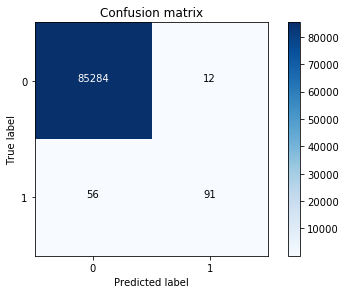

In [45]:
##confusion matrix on whole_sample, uesing whole_sample train
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred_undersample = lr.predict(X_test.values)
print(y_pred_undersample.shape)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [52]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_proba = lr.predict_proba(X_test.values)
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_class1_recall = y_pred_proba[:,1] > i
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test,y_test_predictions_class1_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

Recall metric in the testing dataset:  0.993197278912
Recall metric in the testing dataset:  0.945578231293
Recall metric in the testing dataset:  0.918367346939
Recall metric in the testing dataset:  0.877551020408
Recall metric in the testing dataset:  0.836734693878
Recall metric in the testing dataset:  0.816326530612
Recall metric in the testing dataset:  0.755102040816
Recall metric in the testing dataset:  0.714285714286
Recall metric in the testing dataset:  0.571428571429


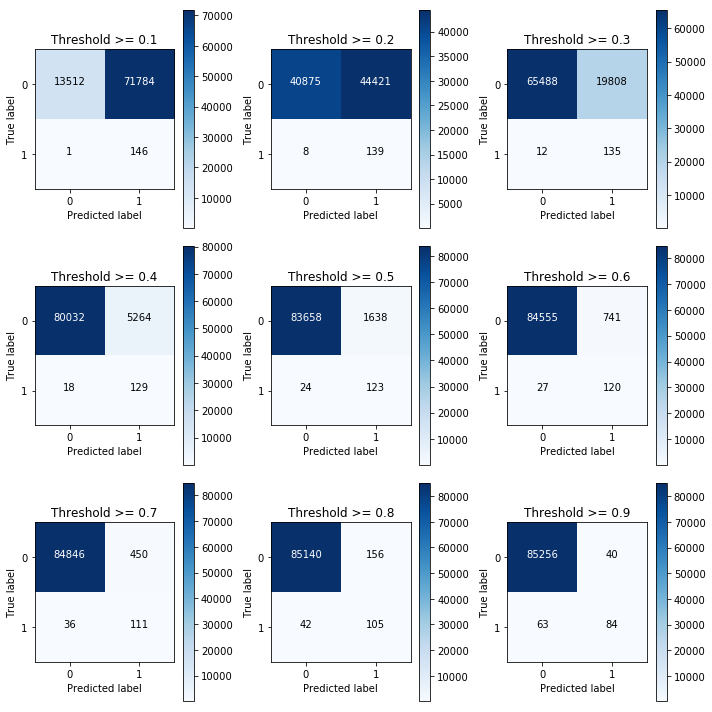

In [53]:
plt.show()